# Data Understanding 

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import shapiro

In [6]:
# Loading the data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")

In [7]:
# previewing the first five rows of the train set
train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [8]:
# previewing the last five rows of the train set
train.tail()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080
299999,299999,Under Armour,Canvas,Small,2.0,No,Yes,Backpack,Black,18.568865,26.72762


In [9]:
# previewing the first five rows of the test set
test.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [10]:
# previewing the last five rows of the test set
test.tail()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
199995,499995,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Red,7.383498
199996,499996,Nike,Polyester,Small,9.0,No,Yes,Messenger,Pink,6.058394
199997,499997,Jansport,Nylon,Small,9.0,No,Yes,Tote,Green,26.890163
199998,499998,Puma,Nylon,Large,10.0,Yes,No,Tote,Gray,25.769153
199999,499999,Under Armour,Leather,Medium,8.0,Yes,Yes,Messenger,Pink,29.175026


In [11]:
# Checking the shape of the dataset
print(f"The train dataset has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"The test dataset has {test.shape[0]} rows and {test.shape[1]} columns")

The train dataset has 300000 rows and 11 columns
The test dataset has 200000 rows and 10 columns


In [12]:
# Getting more information about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [13]:
# Getting more information about the dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    200000 non-null  int64  
 1   Brand                 193773 non-null  object 
 2   Material              194387 non-null  object 
 3   Size                  195619 non-null  object 
 4   Compartments          200000 non-null  float64
 5   Laptop Compartment    195038 non-null  object 
 6   Waterproof            195189 non-null  object 
 7   Style                 194847 non-null  object 
 8   Color                 193215 non-null  object 
 9   Weight Capacity (kg)  199923 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 15.3+ MB


In [14]:
# Summary statistics
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,300000.0,NaN,NaN,NaN,149999.5,86602.684716,0.0,74999.75,149999.5,224999.25,299999.0
Brand,290295,5,Adidas,60077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material,291653,4,Polyester,79630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,293405,3,Medium,101906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Compartments,300000.0,NaN,NaN,NaN,5.44359,2.890766,1.0,3.0,5.0,8.0,10.0
Laptop Compartment,292556,2,Yes,148342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Waterproof,292950,2,Yes,148077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Style,292030,3,Messenger,100031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,290050,6,Pink,51690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight Capacity (kg),299862.0,NaN,NaN,NaN,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0


In [15]:
# Checking for missing values on the train set
missing_value_percentage_train = (train.isna().sum()/len(train)) * 100
missing_value_percentage_train

id                      0.000000
Brand                   3.235000
Material                2.782333
Size                    2.198333
Compartments            0.000000
Laptop Compartment      2.481333
Waterproof              2.350000
Style                   2.656667
Color                   3.316667
Weight Capacity (kg)    0.046000
Price                   0.000000
dtype: float64

In [16]:
# Checking for missing values on the train set
missing_value_percentage_test = (test.isna().sum()/len(test)) * 100
missing_value_percentage_test

id                      0.0000
Brand                   3.1135
Material                2.8065
Size                    2.1905
Compartments            0.0000
Laptop Compartment      2.4810
Waterproof              2.4055
Style                   2.5765
Color                   3.3925
Weight Capacity (kg)    0.0385
dtype: float64

In [17]:
# Checking for duplicated values in train set
train.duplicated().sum()

0

In [18]:
# Checking for duplicated values in train set
test.duplicated().sum()

0

* id column should be of object data type.
* Compartments column should be an integer.
* Several columns has missing values.
* No duplicated values
# Data Preprocessing
### Type casting

In [21]:
# Converting compartments column data type to integer
train["Compartments"] = train["Compartments"].astype("int")
test["Compartments"] = test["Compartments"].astype("int")

In [22]:
# Converting id column data type to object
train["id"] = train["id"].astype("object")
test["id"] = test["id"].astype("object")

### Handling missing values

In [24]:
# Null rows dataframe
null_rows = train[train.isna().any(axis=1)]
null_rows.head(40)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
5,5,Nike,Canvas,Medium,10,No,Yes,NaN,Black,7.241812,20.01553
6,6,Nike,NaN,Large,3,No,No,Backpack,Green,6.828123,84.80500
10,10,Nike,Polyester,Large,1,Yes,No,Backpack,NaN,27.806951,68.31047
11,11,Nike,Polyester,NaN,10,No,No,NaN,Gray,13.697554,23.25963
21,21,Under Armour,Polyester,NaN,9,Yes,Yes,Messenger,Gray,11.219052,35.46348
22,22,Puma,Nylon,Large,7,Yes,NaN,Backpack,Gray,17.181182,132.68502
30,30,NaN,Leather,Large,3,No,Yes,Tote,Blue,21.304434,138.32699
38,38,Adidas,Polyester,NaN,5,Yes,Yes,Messenger,Black,21.547849,53.54452
48,48,NaN,Canvas,Medium,2,No,No,Tote,NaN,5.000000,42.28337
54,54,Adidas,Polyester,Small,1,NaN,Yes,Messenger,Green,24.560936,52.89612


In [25]:
# Checking the values of the Brand column
train.Brand.value_counts()

Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
Name: count, dtype: int64

In [26]:
# Handling the null values in brand column
train["Brand"] = train["Brand"].fillna("Others")
test["Brand"] = test["Brand"].fillna("Others")

In [27]:
# Checking the values of the Material column
train.Material.value_counts()

Material
Polyester    79630
Leather      73416
Nylon        70603
Canvas       68004
Name: count, dtype: int64

In [28]:
# Handling the null values in Material column
train["Material"] = train["Material"].fillna("Others")
test["Material"] = test["Material"].fillna("Others")

In [29]:
# Checking the values of the Size column
train.Size.value_counts()

Size
Medium    101906
Large      98643
Small      92856
Name: count, dtype: int64

In [30]:
# Handling the null values in Size column
train["Size"] = train["Size"].fillna("Others")
test["Size"] = test["Size"].fillna("Others")

In [31]:
# Checking the values of the Laptop Compartment column
train["Laptop Compartment"].value_counts()

Laptop Compartment
Yes    148342
No     144214
Name: count, dtype: int64

In [32]:
# Handling the null values in Laptop Compartment column
train["Laptop Compartment"] = train["Laptop Compartment"].fillna(method = "ffill")
test["Laptop Compartment"] = test["Laptop Compartment"].fillna(method = "ffill")
train["Laptop Compartment"] = train["Laptop Compartment"].fillna(method = "bfill")
test["Laptop Compartment"] = test["Laptop Compartment"].fillna(method = "bfill")

In [33]:
# Checking the values of the Waterproof column
train["Waterproof"].value_counts()

Waterproof
Yes    148077
No     144873
Name: count, dtype: int64

In [34]:
# Handling the null values in Waterproof column
train["Waterproof"] = train["Waterproof"].fillna(method = "ffill")
test["Waterproof"] = test["Waterproof"].fillna(method = "ffill")
train["Waterproof"] = train["Waterproof"].fillna(method = "bfill")
test["Waterproof"] = test["Waterproof"].fillna(method = "bfill")

In [35]:
# Checking the values of the Style column
train["Style"].value_counts()

Style
Messenger    100031
Tote          97438
Backpack      94561
Name: count, dtype: int64

In [36]:
# Handling the null values in Style column
train["Style"] = train["Style"].fillna("Others")
test["Style"] = test["Style"].fillna("Others")

In [37]:
# Checking the values of the Color column
train["Color"].value_counts()

Color
Pink     51690
Gray     50280
Blue     48097
Red      47219
Green    46386
Black    46378
Name: count, dtype: int64

In [38]:
# Handling the null values in Color column
train["Color"] = train["Color"].fillna(train["Color"].mode()[0])
test["Color"] = test["Color"].fillna(test["Color"].mode()[0])

In [39]:
# Handling the null values in Weight Capacity (kg) column
train["Weight Capacity (kg)"] = train["Weight Capacity (kg)"].fillna(train["Weight Capacity (kg)"].median())
test["Weight Capacity (kg)"] = test["Weight Capacity (kg)"].fillna(test["Weight Capacity (kg)"].median())

In [40]:
# Chcking if imputation wa successful
print(f"Train missing values - {train.isna().sum().sum()}")
print(f"Test missing values - {train.isna().sum().sum()}")

Train missing values - 0
Test missing values - 0


# Exploratory Data Analysis
## Introduction
The aim of the analysis is to uncover patterns and relationships between variables.

## Univariate analysis
#### What is the distribution of `Price`?

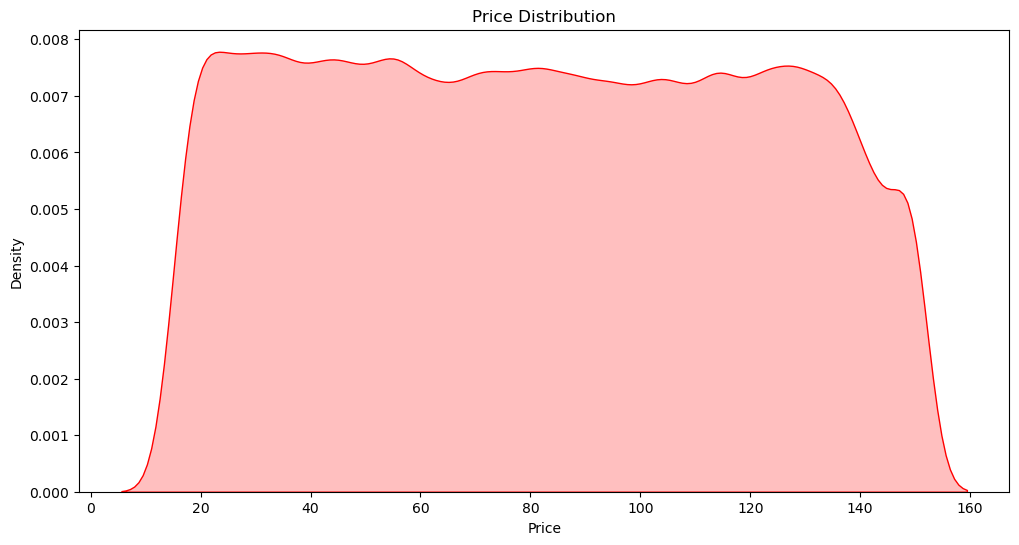

Shapiro-Wilk test statistic: 0.9558, p-value: 0.0000


In [42]:
# Plotting kde plot for `price`
plt.figure(figsize=(12,6))
sns.kdeplot(data=train, x=train.Price,color="red",fill=True)

# Adding labels and title
plt.xlabel("Price")
plt.title("Price Distribution")
plt.show();

# Checking for normality
shapiro_stat, shapiro_p = shapiro(train["Price"])
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")

# p-value < 0.05 -> Reject normality - data is not normal.
# p-value > 0.05 -> Data is approximately normal.

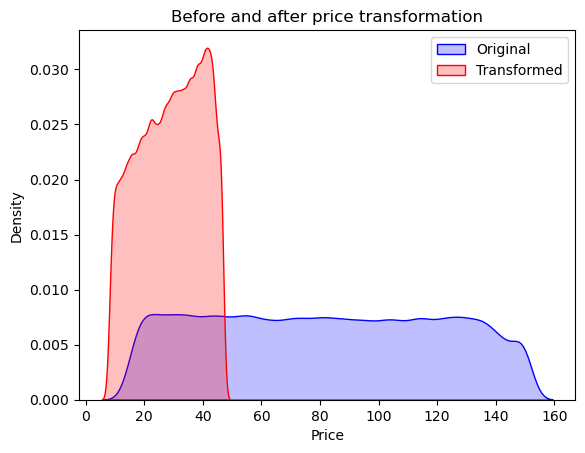

Shapiro-Wilk test statistic: 0.9573, p-value: 0.0000


In [43]:
from scipy.stats import boxcox

# Transforming price vcolumn using boxcox to normalize it
train["Price_transformed"], lambda_bc = boxcox(train["Price"])

# Plotting kde plot for the original and the transformed price column
sns.kdeplot(train["Price"], label = "Original", color="blue", fill=True)
sns.kdeplot(train["Price_transformed"] , label="Transformed", color = "red", fill=True)

# Adding label and title
plt.legend()
plt.title("Before and after price transformation")
plt.show()

# Checking for normality
shapiro_stat, shapiro_p = shapiro(train["Price_transformed"])
print(f"Shapiro-Wilk test statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")

# p-value < 0.05 -> Reject normality - data is not normal.
# p-value > 0.05 -> Data is approximately normal.


#### What is the distribution of `Weight Capacity (kg)`?

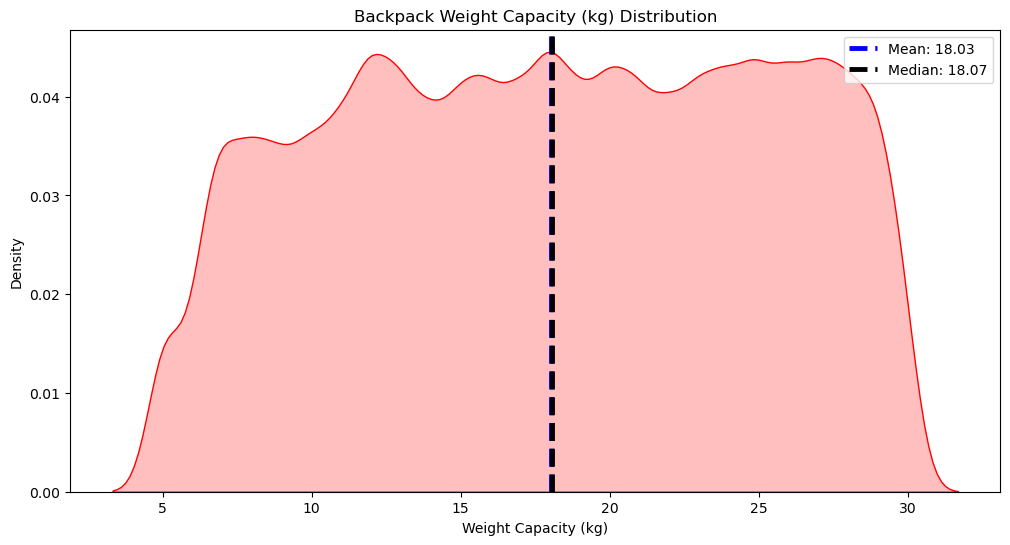

In [45]:
# Calculating mean and median
mean = np.mean(train["Weight Capacity (kg)"])
median = np.median(train["Weight Capacity (kg)"])

# Plotting kde plot for `Weight Capacity (kg)`
plt.figure(figsize=(12,6))
sns.kdeplot(data=train, x="Weight Capacity (kg)", color="red", fill=True)

# Adding vertical lines for mean and median
plt.axvline(mean, color='blue', linestyle='--', label=f"Mean: {mean:.2f}",linewidth=3.5)
plt.axvline(median, color='black', linestyle='--', label=f"Median: {median:.2f}",linewidth=3.5)

# Adding labels and title
plt.legend()
plt.xlabel("Weight Capacity (kg)")
plt.title("Backpack Weight Capacity (kg) Distribution")
plt.show()

#### What is the distribution of `Brand`?

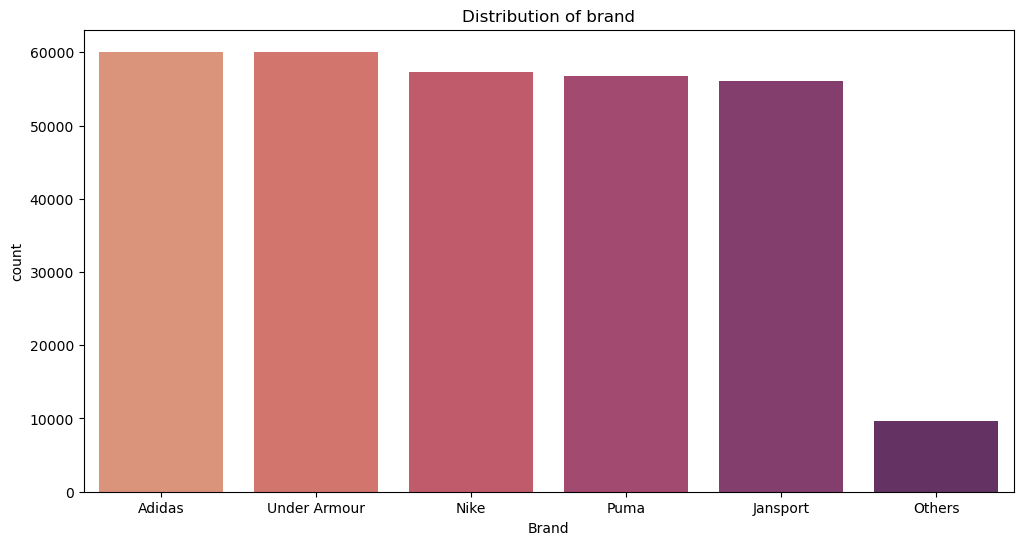

In [47]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Getting the value counts for sorting
brand_order = train["Brand"].value_counts().index

# Plotting a count plot
sns.countplot(data=train, x="Brand", palette="flare", order=brand_order)

# Adding title
plt.title("Distribution of brand")
plt.show()

#### What is the distribution of `Material`?

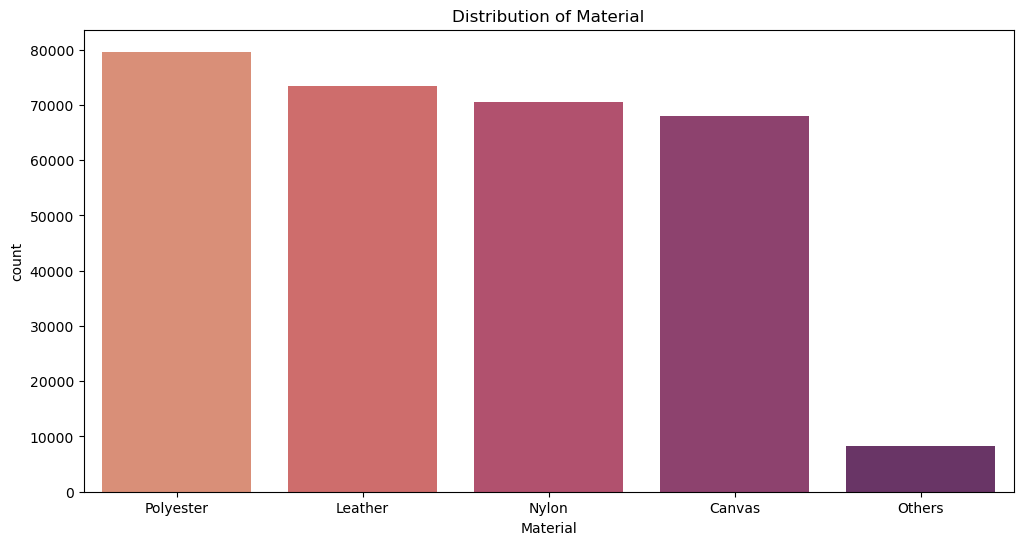

In [49]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Getting the value counts for sorting
material_order = train["Material"].value_counts().index

# Plotting a count plot
sns.countplot(data=train, x="Material", palette="flare", order=material_order)

# Adding title
plt.title("Distribution of Material")
plt.show()

#### What is the distribution of `Size`?

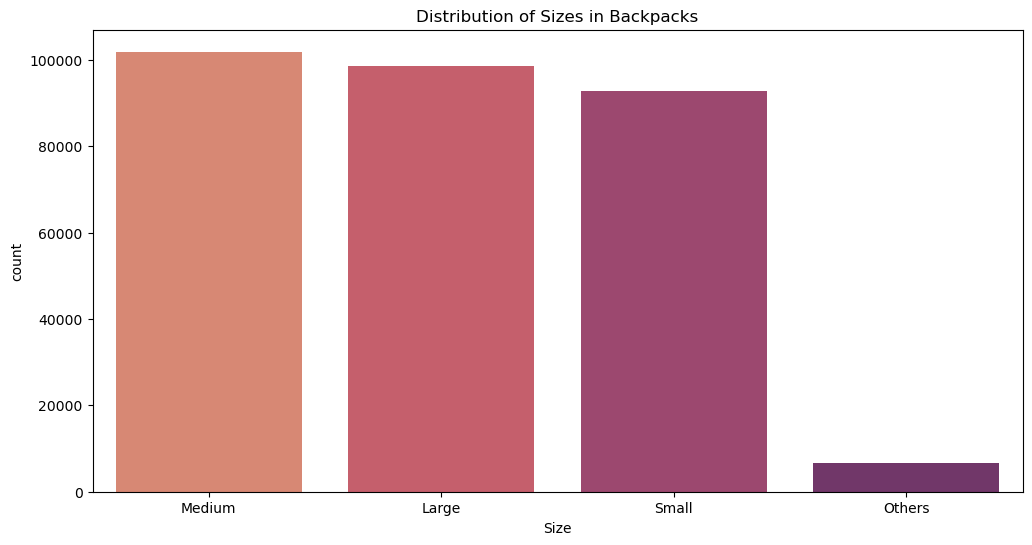

In [51]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Getting the value counts for sorting
size_order = train["Size"].value_counts().index

# Plotting a count plot
sns.countplot(data=train, x="Size", palette="flare", order=size_order)

# Adding title
plt.title("Distribution of Sizes in Backpacks")
plt.show()

#### What is the distribution of `Compartments`?

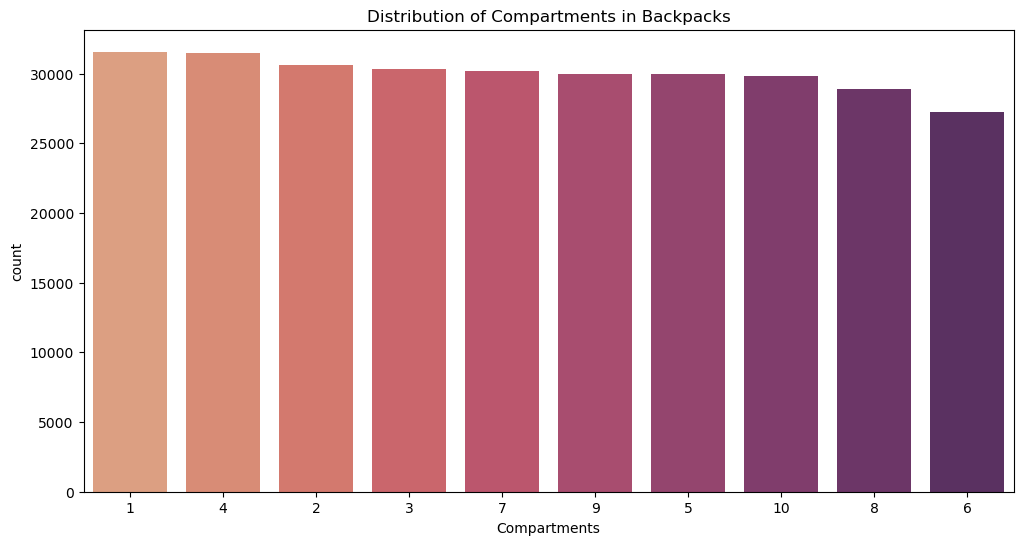

In [53]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Getting the value counts for sorting
compartments_order = train["Compartments"].astype("object").value_counts().index

# Plotting a count plot
sns.countplot(x=train["Compartments"].astype("object"), palette="flare", order=compartments_order)

# Adding title
plt.title("Distribution of Compartments in Backpacks")
plt.show()

#### What is the distribution of `Laptop Compartment`?

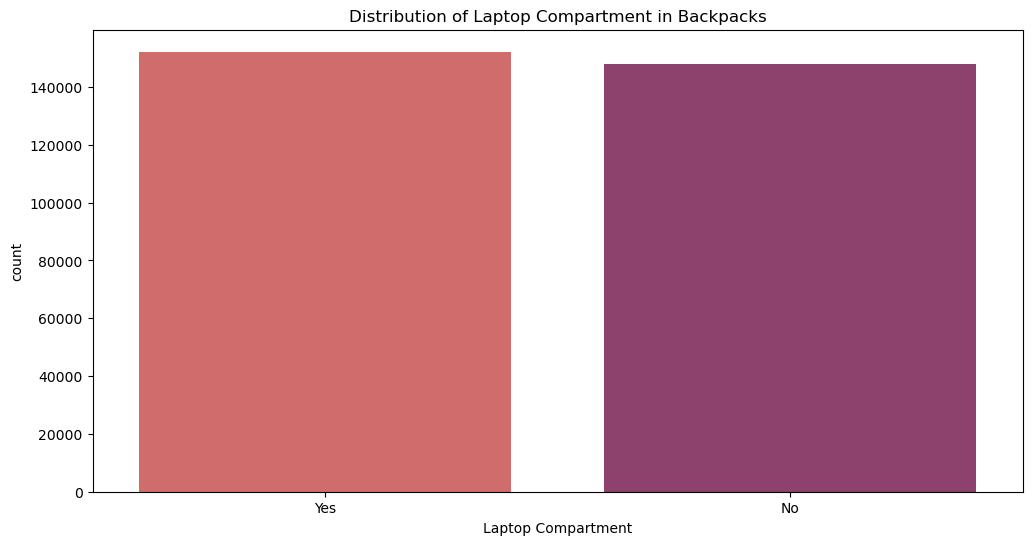

In [55]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Getting the value counts for sorting
laptop_compartment_order = train["Laptop Compartment"].value_counts().index

# Plotting a count plot
sns.countplot(data=train, x="Laptop Compartment", palette="flare", order=laptop_compartment_order)

# Adding title
plt.title("Distribution of Laptop Compartment in Backpacks")
plt.show()

#### What is the distribution of `Waterproof`?

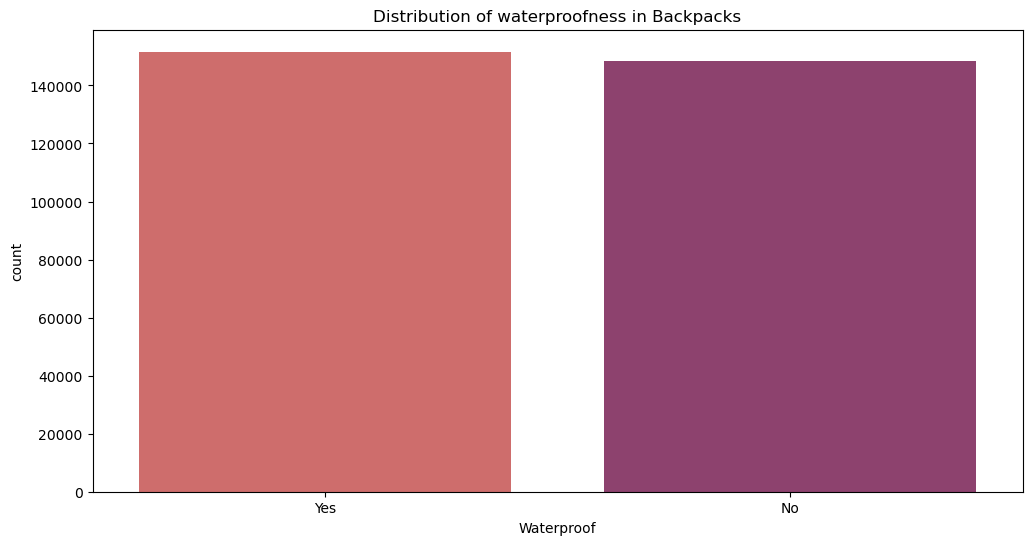

In [57]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Getting the value counts for sorting
waterproof_order = train["Waterproof"].value_counts().index

# Plotting a count plot
sns.countplot(data=train, x="Waterproof", palette="flare", order=waterproof_order)

# Adding title
plt.title("Distribution of waterproofness in Backpacks")
plt.show()

#### What is the distribution of `Style`?

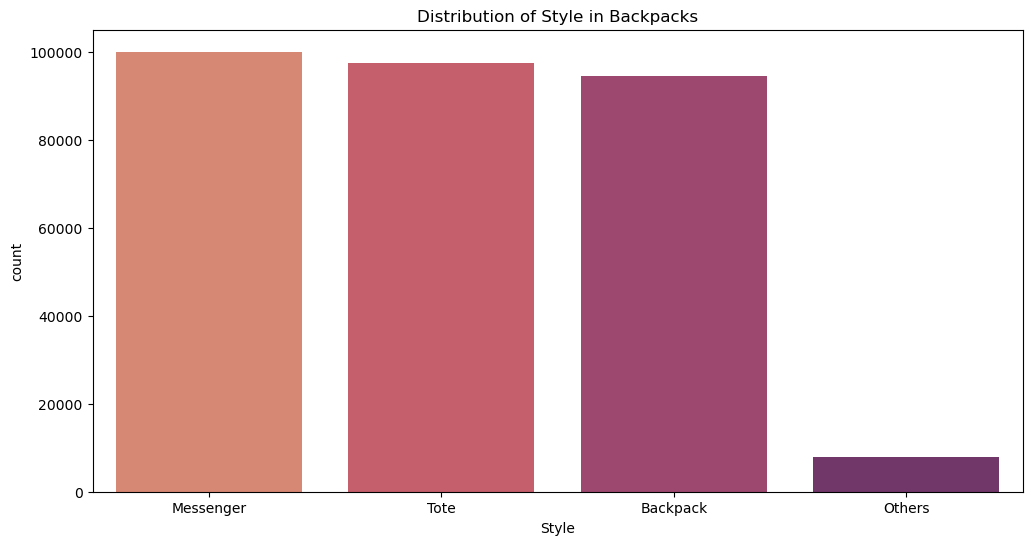

In [59]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Getting the value counts for sorting
style_order = train["Style"].value_counts().index

# Plotting a count plot
sns.countplot(data=train, x="Style", palette="flare", order=style_order)

# Adding title
plt.title("Distribution of Style in Backpacks")
plt.show()

#### What is the distribution of `Color`?

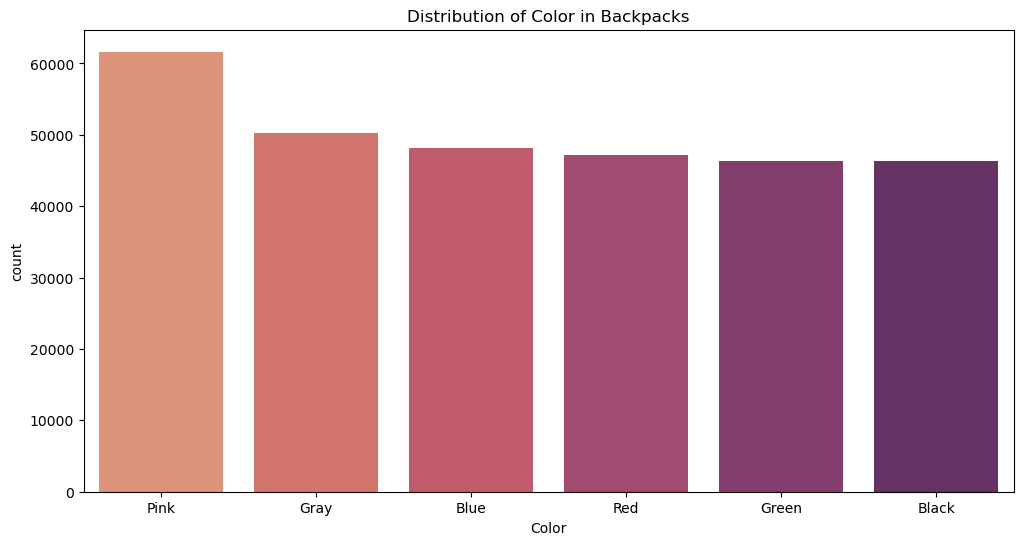

In [61]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Getting the value counts for sorting
color_order = train["Color"].value_counts().index

# Plotting a count plot
sns.countplot(data=train, x="Color", palette="flare", order=color_order)

# Adding title
plt.title("Distribution of Color in Backpacks")
plt.show()

# **Exploratory Data Analysis (EDA) Report**

## **Introduction**
This report performs an exploratory data analysis  on the backpack dataset which contains details about various backpacks including their brand, material,size,number of compartments, laptop compartments,waterproofness, the style, color, weight capacity and their price. The aim of the analysis is to uncover patterns and relationships between these variables.

## **Data Overview**
There are two dataset, train dataset is for training the model and the test for making predictions.

#### Dataset Shape
The train dataset has **300,000 rows** and **11 columns** and the test dataset has **200,000 rows** and **10 columns**.

#### Column Descriptions
- **Brand**: The brand of the bag.
- **Material**: The primary material used.
- **Size**: The size of the bag.
- **Compartments**: The number of compartments in the bag (1 to 10).
- **Laptop Compartment**: Whether the bag has a laptop compartment (Yes/No).
- **Waterproof**: Whether the bag is waterproof (Yes/No).
- **Style**: The style of the bag.
- **Color**: The color of the bag.
- **Weight Capacity (kg)**: The maximum weight the bag can hold.
- **Price**: The price of the bag in USD.

### Missing Values
Before starting the analysis, I checked for any missing values:
- The dataset had **no missing values** in the `Compartment` and `Price` columns.
- The `Brand`, `Material`, `Size`, `Laptop Compartments`, `Waterproof`, `Style`, `Color`, and `Weight Capacity (kg)` columns contained a small number of missing entries, which were filled using different imputation methods.

## **Univariate Analysis**
#### Distribution of **Brand**
Adidas is the most common backpack brand in the dataset, followed by Under Armour and Nike.

#### Distribution of **Material**
Polyester is the most used material for backpacks in this dataset, followed by leather.

#### Distribution of **Size**
Medium-sized backpacks are more popular than large and small ones. This shows that people prefer a balance between space and ease of carrying.

#### Distribution of **Compartments**
Backpacks with fewer compartments (1 to 4) are the most common with single-compartment backpacks being the most preferred. This suggests that users generally opt for simpler designs over multi-compartment options.

#### Distribution of **Laptop Compartment**
Backpacks with a laptop compartment are slightly more common than those without but the difference is not significant. This shows that having a laptop compartment is a common feature but not necessarily a strong differentiator among backpacks in the dataset.

#### Distribution of **Waterproof**
Backpacks that are waterproof are sightly more common than those that are not waterproof but the difference is not significant.

#### Distribution of **Style**
Messenger bags are the most preferred type of backpack, followed by tote bags, regular backpacks, and other designs.

#### Distribution of **Color**
Pink is th most prefered color of bag compared to the other colors

#### Distribution of **Weight Capacity (kg)**
The Weight Capacity distribution is platykurtic (flat peak and light tails) showing that most backpacks weigh in the mid-range with fewer extreme values at both the low and high ends. This suggests a more uniform spread of wight with some outliers but not an excessive concentration of data around a central value.
The average weight capacity of a bag is 18.03kg
#### Distribution of **Price**
The price distribution is platykurtic (flat peak and light tails) showing that most backpacks are priced in the mid-range with fewer extreme values at both the low and high ends. This suggests a more uniform spread of prices with some outliers but not an excessive concentration of data around a central value. The average price of a bag is 81.41 USD

## **Bivariate Analysis**


In [63]:
train.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price',
       'Price_transformed'],
      dtype='object')

In [64]:
train.dtypes

id                       object
Brand                    object
Material                 object
Size                     object
Compartments              int32
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
Price_transformed       float64
dtype: object